# Basic Atoms objects

In [1]:
from ase import Atoms # the central object in ASE
from ase.build import molecule #G2 molecule test set 
from ase.visualize import view #To utilize this functionality
# you need to have NGLView and ipywidgets packages installed
# in addition to the Jupyter notebook

d = 1.10
N2 = Atoms('2N', positions=[(0., 0., 0.), (0., 0., d)])
#view(N2)

benz = molecule('C6H6')
view(benz)

In [2]:
from ase import Atoms
a = 2.04
gold = Atoms('Au', pbc=True, cell =[[0 , a, a],[a, 0, a],[a, a, 0]])
# Q1: what lattice do we have here?
print(gold)

Atoms(symbols='Au', pbc=True, cell=[[0.0, 2.04, 2.04], [2.04, 0.0, 2.04], [2.04, 2.04, 0.0]])


In [3]:
from ase.visualize import view 
view(gold.repeat((3 , 3 , 3)))

In [4]:
#Writng and Reading structural files 
from ase.io import read
from ase.io import write

#write('gold.xyz', gold, vec_cell=True) unreadable by Jmol
write('gold.cif', gold)

gold_from_file = read('gold.cif')
print(gold_from_file)

Atoms(symbols='Au', pbc=True, cell=[[2.885, 0.0, 0.0], [1.4425000000000001, 2.4984832899181053, 0.0], [1.4425000000000001, 0.8328277633060353, 2.355592635976489]], spacegroup_kinds=...)


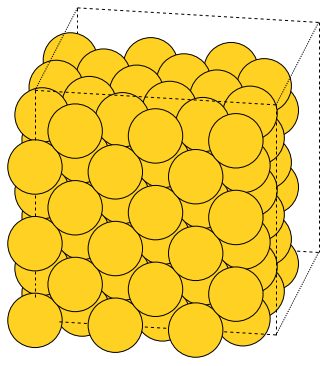

In [5]:
#Creating figure
from IPython.display import Image
from ase.io import write
from ase.build import bulk

gold_cubic = bulk('Au', 'fcc', a=4.08, cubic=True)

write('gold.png', gold_cubic.repeat((3, 3, 3)), rotation='80y,20x', show_unit_cell =2, )

Image(filename='gold.png') 

In [6]:
from ase.build import bulk
write('movie.gif', [bulk(s, 'fcc', a=4.08, cubic=True) for s in ['Cu', 'Ag', 'Au']], interval=500)

In C:\Sci\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Sci\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Sci\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Sci\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Sci\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam

In [7]:
# building more complex structures
from ase.spacegroup import crystal
a = 4.6
c = 2.95

rutile = crystal( 
cellpar    = [a, a, c, 90 , 90 , 90],
symbols    = ['Ti', 'O'],
basis      = [(0 , 0, 0), (0.3 , 0.3 , 0.0)], 
spacegroup = 136 )
# view(rutile)
view(rutile*(2,2,2))
# write('rutile.cif', rutile)
#view(rutile)

In [8]:
#building slabs with adsorbate molecules on the surface
from ase import Atoms
from ase.build import fcc111, add_adsorbate, bulk
from ase.io import read, write

adsorbate = Atoms('CO')

adsorbate[1].z = 1.1
a = 3.61 # in Angstroms
slab = fcc111('Cu', (2, 2, 3), a=a, vacuum=7.0)
add_adsorbate(slab, adsorbate, 4.8, 'ontop')
write('slab.xyz', slab, vec_cell=True )
write('slab.png', slab * (3, 3, 1), rotation='10z,-80x')
# Image(filename='slab.png')
view(slab* (3, 3, 1))

# Calculators

In [9]:
from ase.calculators.emt import EMT # effective medium theory (EMT) calculator, as it is very fast and hence useful for getting started.

benz = molecule('C6H6')

benz.calc = EMT()

e = benz.get_potential_energy()

print('Potential energy is', e, 'eV')

benz.get_forces()


Potential energy is 4.2359775070555274 eV


array([[-3.05311332e-16, -4.34206726e+00,  0.00000000e+00],
       [-3.76033060e+00, -2.17102758e+00,  0.00000000e+00],
       [-3.76033060e+00,  2.17102758e+00,  0.00000000e+00],
       [-1.62630326e-16,  4.34206726e+00,  0.00000000e+00],
       [ 3.76033060e+00,  2.17102758e+00,  0.00000000e+00],
       [ 3.76033060e+00, -2.17102758e+00,  0.00000000e+00],
       [ 0.00000000e+00,  3.11965477e+00,  0.00000000e+00],
       [ 2.70169008e+00,  1.55982086e+00,  0.00000000e+00],
       [ 2.70169008e+00, -1.55982086e+00,  0.00000000e+00],
       [ 7.13635846e-18, -3.11965477e+00,  0.00000000e+00],
       [-2.70169008e+00, -1.55982086e+00,  0.00000000e+00],
       [-2.70169008e+00,  1.55982086e+00,  0.00000000e+00]])

# Optimization

In [10]:
from ase.calculators.emt import EMT
from ase.io import write
from IPython.display import Image

N2 = Atoms('2N', positions=[(0., 0., 0.), (0., 0., 5)])
N2.calc = EMT()
print('N2 bond length = {:.2f} A'.format(N2.get_all_distances()[0][1] ))
write('N2_init.png', N2, rotation='90y,90x', show_unit_cell =2, )
Image(filename='N2_init.png')
#N2.get_forces()


N2 bond length = 5.00 A


In [11]:
from ase.optimize import QuasiNewton

dyn = QuasiNewton(N2, trajectory='N2.traj')
dyn.run(fmax=0.05)
print('N2 bond length = {:.2f} A'.format(N2.get_all_distances()[0][1] ))
write('N2_end.png', N2, rotation='90y,90x', show_unit_cell =2, )
Image(filename='N2_end.png')

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 00:58:06       10.167752*       0.0567
BFGSLineSearch:    1[  4] 00:58:06       10.113542*       0.1490
BFGSLineSearch:    2[ 10] 00:58:06        9.175010*       1.6097
BFGSLineSearch:    3[ 17] 00:58:06        0.262853*       0.0767
BFGSLineSearch:    4[ 19] 00:58:06        0.262777*       0.0042
N2 bond length = 1.00 A
